此笔记来源：

https://mp.weixin.qq.com/s/naAD1M30uuhYPvtppIRVsQ

本人仅进行整理和个人创新。

# 1 cufflinks 安装

pip install cufflinks 

## 1.1 cufflinks支持的图形

In [7]:
cf.help()

Use 'cufflinks.help(figure)' to see the list of available parameters for the given figure.
Use 'DataFrame.iplot(kind=figure)' to plot the respective figure
Figures:
	bar
	box
	bubble
	bubble3d
	candle
	choroplet
	distplot
	heatmap
	histogram
	ohlc
	pie
	ratio
	scatter
	scatter3d
	scattergeo
	spread
	surface
	violin


# 1.2 查看某一类图的详细参数

In [8]:
cf.help('bar') #查看bar图

BAR
Bar Chart
Supports categories and horizontal bar charts


Parameters:
    bargap : float
        Sets the gap between bars
        	[0,1)
    bargroupgap : float
        Sets the gap between groups
        	[0,1)
    barmode : string
        Bar mode
        	group
        	stack
        	overlay
    categories : string
        Name of the column that contains the categories
    orientation : string
        Sets the orientation of the bars.
        	h
        	v
    sortbars : bool
        Sort bars in descending order


    colors : dict, list or string
        Trace color
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values
        	colorname : see cufflinks.colors.cnames
        	hex : '#ffffff'
        	rgb : 'rgb(23,50,23)'
        	rgba : 'rgba(23,50,23,.5)
    colorscale : string
        Color scale name
        If the color is preceded by a minus (-

## 1.3 cufflinks 7类绘图风格

In [9]:
cf.getThemes() 

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

## 1.4 cufflinks颜色设置

通过colorscale参数修改调色盘；通过colors传递色号，支持三类色号：
1. HEX "#db4052"
2. RGB "rgb(219, 64, 82)"
3. RGBA "rgba(219, 64, 82, 1.0)"

In [16]:
cf.colors.scales()#调色盘p品种

# 2 cufflinks快速上手

cufflinks的函数iplot，将Pandas的可视化方法与Plotly及Cufflinks的绘图方法结合起来。

In [48]:
#导入依赖，标准设置
import cufflinks as cf
import pandas as pd
import numpy as np
cf.set_config_file(offline=True)
cf.get_config_file()# 离线使用 在线有bug我不知道为啥但是我就是这样解决了。

{'sharing': 'public',
 'theme': 'henanigans',
 'colorscale': 'dflt',
 'offline': True,
 'offline_connected': True,
 'offline_url': '',
 'offline_show_link': True,
 'offline_link_text': 'Export to plot.ly',
 'datagen_mode': 'stocks',
 'dimensions': None,
 'margin': None,
 'offline_config': None}

In [49]:
#使用iris数据集
import seaborn as sns
pd_iris = pd.read_csv(r"E:/git/seaborn-data/iris.csv")#这里建议去GitHub里面去下载下来数据，在本地读取。
#github链接https://github.com/mwaskom/seaborn-data
pd_iris.head(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


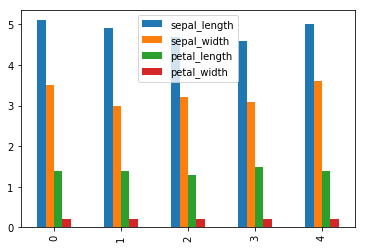

In [50]:
pd_iris.head(n=5).plot(kind='bar')#Pandas可视化方法

### 2.1 柱形图

In [53]:
#iplot结合pandas可视化方法与ploty方法
pd_iris.head(n=5).iplot(kind='bar',colorscale='set1')

## 2.2 分面柱形图

In [54]:
#subplots绘制分面图
pd_iris.head(n=5).iplot(kind='bar',colorscale='set1',subplots=True)

In [56]:
pd_iris.head(n=5).iplot(kind='bar',colorscale='set1',barmode='stack')

## 2.3 水平柱状图

In [57]:
pd_iris.head(n=5).iplot(kind='barh',colorscale='set1',barmode='stack')

## 2.3 箱图

In [58]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.iplot(kind='box',colorscale='set1')

## 2.4 矩阵图

In [59]:
pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd']).scatter_matrix()

## 2.5 气泡图

In [60]:
pd_iris.iplot(kind='bubble',x='sepal_length',y='sepal_width',size='petal_length')

## 2.6 折线图

In [61]:
pd_iris.iplot(title='Cufflinks - Line Chart',colorscale='set1')

## 2.7 分面折线图

In [62]:
pd_iris.iplot(subplots=True,shape=(5,1),shared_xaxes=True,vertical_spacing=.02,fill=True)

## 2.8 填充折线图

In [63]:
pd_iris.iplot(title='Cufflinks - Filled Line Chart',colorscale='set1',fill=True)

## 2.9 折线图拟合线

In [64]:
pd_iris['sepal_length'].iplot(title='Cufflinks - Besfit Line Chart',
                         filename='Cufflinks - Bestfit Line Chart',bestfit=True,colors=['blue'],
                         bestfit_colors=['pink'])

## 2.10 散点图

In [65]:
pd_iris['sepal_length'].iplot(kind='scatter',mode='markers',size=10,symbol='bowtie-open',colorscale='set1',title='Cufflinks - Scatter Chart')

## 2.11 spread图

In [66]:
pd_iris.iplot(kind='spread',title='Cufflinks - Spread Chart')

## 2.12 histogram图

In [67]:
pd_iris.iplot(kind='histogram',opacity=.75,title='Cufflinks - Histogram',colorscale='set1')

## 2.13 3d图

In [68]:
pd_iris.iplot(kind='scatter3d',x='sepal_length',y='petal_length',z='sepal_width',size=15,categories='species',text='petal_width',
                             title='Cufflinks - Scatter 3D Chart',colors=['blue','pink','green'],width=0.5,margin=(0,0,0,0),
                             opacity=1)